In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import pandas_datareader
import datetime
from pandas_datareader import data as wb
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
print(pandas_datareader.__version__)

0.8.1


# Getting the Data 

In [128]:
tickers = ['XEF.TO', 'VTINX','EEMV','ACWV', 'XIC.TO','VUSTX', 'ZFL.TO','FXC'] 
pf = pd.DataFrame()
for t in tickers:
    pf[t] = wb.DataReader(t, data_source='yahoo', start = '2017-1-1')['Adj Close']




In [129]:
pf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
XEF.TO,737.0,28.911089,1.502802,24.901621,27.923750,29.330000,30.045574,31.780001
VTINX,723.0,12.860777,0.542951,11.828728,12.546522,12.779730,13.143850,14.090000
EEMV,724.0,56.127458,3.292929,46.280823,54.635010,56.790001,58.473510,63.224716
ACWV,724.0,82.702293,6.771113,68.930138,78.049303,81.910324,87.385323,96.040001
XIC.TO,737.0,24.212064,1.331331,21.377787,23.005344,24.047182,25.218849,27.350000
VUSTX,723.0,11.684467,0.845166,10.626479,11.118418,11.450825,11.765093,14.199274
ZFL.TO,737.0,16.861602,1.001899,15.602981,16.130997,16.465218,17.391327,19.712141
FXC,724.0,74.893326,1.805715,70.914230,73.648983,74.570805,75.854403,80.450493


In [130]:
#wealth simple account

xef 22
vtin 22
eemv 17
acwv 11
xic 11
vus 5

zfl 7
qtip 3
cad 2


SyntaxError: invalid syntax (<ipython-input-130-ddc195464dde>, line 3)

In [132]:
log_ret = np.log(pf / pf.shift(1))
log_ret.head()

,XEF.TO,VTINX,EEMV,ACWV,XIC.TO,VUSTX,ZFL.TO,FXC
Date,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.002246,0.003113,0.010333,0.006572,0.006943,0.003393,0.005737,0.009474
2017-01-05,0.003731,0.003103,0.013017,0.005308,0.004062,0.014291,0.005136,0.005105
2017-01-06,-0.003358,-0.002326,-0.007189,-0.000407,-0.004876,-0.009224,-0.006853,0.000536
2017-01-09,-0.002245,0.000776,-0.002207,-0.002992,-0.006539,0.008389,0.006284,0.000536


In [133]:
log_ret.corr()

,XEF.TO,VTINX,EEMV,ACWV,XIC.TO,VUSTX,ZFL.TO,FXC
XEF.TO,1.000000,0.666396,0.609200,0.672874,0.686427,-0.305699,-0.185520,-0.137480
VTINX,0.666396,1.000000,0.755727,0.878568,0.698408,0.085110,0.016286,0.387379
EEMV,0.609200,0.755727,1.000000,0.730026,0.599444,-0.183025,-0.198223,0.417204
ACWV,0.672874,0.878568,0.730026,1.000000,0.669320,-0.089271,-0.100542,0.343736
XIC.TO,0.686427,0.698408,0.599444,0.669320,1.000000,-0.245227,-0.231940,0.143280
VUSTX,-0.305699,0.085110,-0.183025,-0.089271,-0.245227,1.000000,0.770260,0.010402
ZFL.TO,-0.185520,0.016286,-0.198223,-0.100542,-0.231940,0.770260,1.000000,-0.193565
FXC,-0.137480,0.387379,0.417204,0.343736,0.143280,0.010402,-0.193565,1.000000


In [134]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
XEF.TO,736.0,0.000325,0.006654,-0.035730,-0.003220,0.000349,0.004394,0.026433
VTINX,709.0,0.000249,0.002162,-0.009619,-0.000750,0.000717,0.001488,0.011597
EEMV,710.0,0.000388,0.007235,-0.030731,-0.003938,0.000705,0.005013,0.025111
ACWV,710.0,0.000501,0.005185,-0.029112,-0.001692,0.000620,0.003310,0.030555
XIC.TO,736.0,0.000252,0.005324,-0.023786,-0.002496,0.000598,0.003735,0.026871
VUSTX,709.0,0.000250,0.006375,-0.021667,-0.004107,0.000740,0.004250,0.023846
ZFL.TO,736.0,0.000206,0.005209,-0.015488,-0.002958,0.000000,0.003439,0.019527
FXC,710.0,0.000047,0.004130,-0.015312,-0.002557,-0.000130,0.002228,0.016039


# My WS PF

In [135]:
# Set seed (optional)
#np.random.seed(101)

# My Portfolio Weights
print('My Portfolio Weights')
#holdings in thousands



my_weights = np.array([22,22,17,11,11,5,7,2])
print(my_weights)
print('\n')
 


# Rebalance Weights
print('Rebalance to sum to 1.0')
my_weights = my_weights / np.sum(my_weights)
print(my_weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
my_exp_ret = np.sum(log_ret.mean() * my_weights) *250
print(my_exp_ret)
print('\n')


# Expected Variance
print('Expected Volatility')
my_exp_vol = np.sqrt(np.dot(my_weights.T, np.dot(log_ret.cov() * 250, my_weights)))
print(my_exp_vol)
print('\n')

# Sharpe Ratio  ASSUMES RF of 0 , subtract 2% if want to be more accurate
my_SR = my_exp_ret/my_exp_vol
print('Sharpe Ratio')
print(my_SR)

My Portfolio Weights
[22 22 17 11 11  5  7  2]


Rebalance to sum to 1.0
[0.22680412 0.22680412 0.17525773 0.11340206 0.11340206 0.05154639
 0.07216495 0.02061856]


Expected Portfolio Return
0.07809512378180873


Expected Volatility
0.059995583088966443


Sharpe Ratio
1.3016812198658487


# Monte Carlo Simulation PF

In [136]:
num_assets = len(tickers)
num_assets

8

In [137]:
rand_weights = np.random.random(num_assets)
rand_weights /= np.sum(rand_weights)


In [138]:
rand_weights

array([0.15490766, 0.17512081, 0.08902048, 0.13199096, 0.09067084,
       0.08627414, 0.18380167, 0.08821344])

In [186]:
pfolio_returns = []
pfolio_volatilities = []
all_weights = np.zeros((10000,len(log_ret.columns)))


for x in range (10000):
    rand_weights = np.random.random(num_assets)
    rand_weights /= np.sum(rand_weights)
    all_weights[x,:] = rand_weights
    pfolio_returns.append(np.sum(rand_weights * log_ret.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(rand_weights.T,np.dot(log_ret.cov() * 250, rand_weights))))
    
    
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)   

pfolio_returns, pfolio_volatilities

(array([0.06204546, 0.06730852, 0.09060877, ..., 0.0819136 , 0.06640352,
        0.06518468]),
 array([0.04373302, 0.04840979, 0.06828251, ..., 0.05788929, 0.04516815,
        0.04872225]))

In [187]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [188]:
portfolios.head()

,Return,Volatility
0,0.062045,0.043733
1,0.067309,0.048410
2,0.090609,0.068283
3,0.073579,0.068184
4,0.066668,0.048542


In [189]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Return        10000 non-null float64
Volatility    10000 non-null float64
dtypes: float64(2)
memory usage: 156.4 KB


In [190]:
portfolios['Sharpe_Ratio']= portfolios['Return']/portfolios['Volatility']

In [192]:
max_sr= portfolios['Sharpe_Ratio'].argmax()

/Users/mk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [193]:
portfolios['Sharpe_Ratio'][max_sr]

1.7500571621505063

In [194]:
max_sr_ret = portfolios['Return'][max_sr]
print(max_sr_ret)

0.08321227542986952


In [196]:
max_sr_vol = portfolios['Volatility'][max_sr]
print(max_sr_vol)

0.047548318551844646


In [197]:
all_weights[max_sr,:]

array([0.02421671, 0.27481421, 0.00966607, 0.36592827, 0.03817006,
       0.14362985, 0.10762854, 0.03594629])

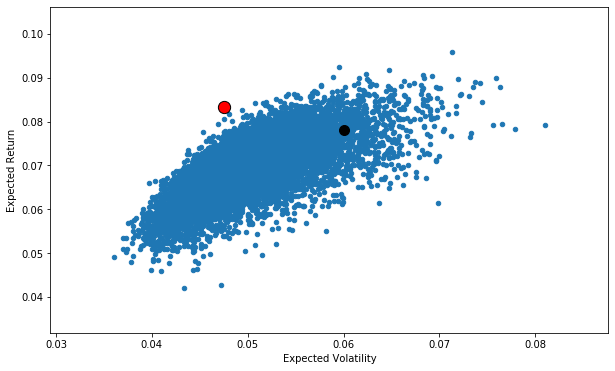

In [201]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#Add my portfolio
plt.scatter(my_exp_vol,my_exp_ret,label= 'my pf',c='black',s=100,edgecolors='black')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=150,edgecolors='black')


# PLOT PORTFOLIO RISK AND RETURN 

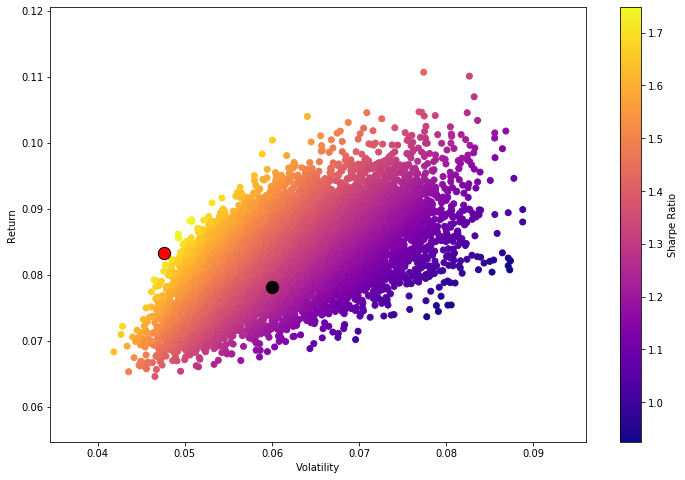

In [204]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


# Add red dot for max SR
plt.scatter(my_exp_vol,my_exp_ret,c='black',s=150,edgecolors='black')

#Add my portfolio
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=150,edgecolors='black')